<a href="https://colab.research.google.com/github/Vik-Gt-321/Aerospace-Codes/blob/main/C-frame-mechanism-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import math
import matplotlib.pyplot as plt

In [ ]:
AB = 6
BC = 5
CD = 9
DA = 6

In [ ]:
omega_ab = math.pi/40
theta_ab0 = math.pi/10
t =  np.linspace(0, 20, 1000)

In [ ]:
theta_ab = theta_ab0 + omega_ab*t

# Pos analysis

In [ ]:
P = 2*AB*CD*np.cos(theta_ab) - CD*DA
Q = 2*AB*CD*np.sin(theta_ab)
R = BC**2 - DA**2 - AB**2 - CD**2 + 2*AB*DA*np.cos(theta_ab)
S = np.sqrt(P**2 + Q**2)

In [ ]:
alpha = np.arctan(P/Q)

In [ ]:
theta_cd = np.arcsin(R/S) - alpha

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arcsin
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Theta (deg)')

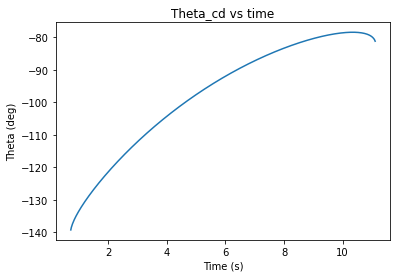

In [ ]:
plt.plot(t, theta_cd*180/math.pi)
plt.title("Theta_cd vs time")
plt.xlabel("Time (s)")
plt.ylabel("Theta (deg)")

Text(0, 0.5, 'Theta (deg)')

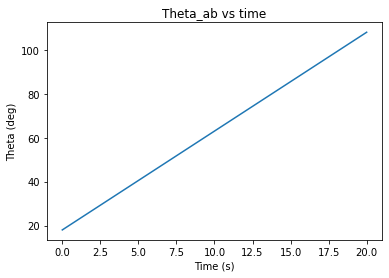

In [ ]:
plt.plot(t, theta_ab*180/math.pi)
plt.title("Theta_ab vs time")
plt.xlabel("Time (s)")
plt.ylabel("Theta (deg)")

In [ ]:
x_b = AB*np.cos(theta_ab)
x_c = DA - CD*np.cos(theta_cd)
y_b = AB*np.sin(theta_ab)
y_c = -CD*np.sin(theta_cd)   

In [ ]:
theta_bc = np.arctan( (y_c - y_b)/ (x_c - x_b))

Text(0, 0.5, 'Theta (deg)')

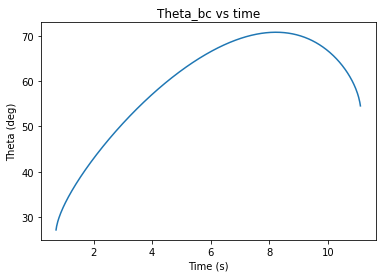

In [ ]:
plt.plot(t, theta_bc*180/math.pi)
plt.title("Theta_bc vs time")
plt.xlabel("Time (s)")
plt.ylabel("Theta (deg)")

#Velocity analysis

In [ ]:
num = AB*omega_ab*np.sin(theta_ab - theta_cd)
den = CD*np.sin(theta_bc - theta_cd)
omega_cd = num/den

Text(0, 0.5, 'Omega (rad/s)')

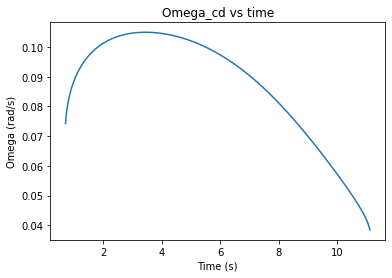

In [ ]:
plt.plot(t, omega_cd)
plt.title("Omega_cd vs time")
plt.xlabel("Time (s)")
plt.ylabel("Omega (rad/s)")

In [ ]:
# omega bc
num_omg_bc = -(AB*omega_ab*np.sin(theta_ab) + CD*omega_cd*np.sin(theta_cd))
den_omg_bc = BC*np.sin(theta_bc)
omega_bc = num_omg_bc/den_omg_bc


Text(0, 0.5, 'Omega (rad/s)')

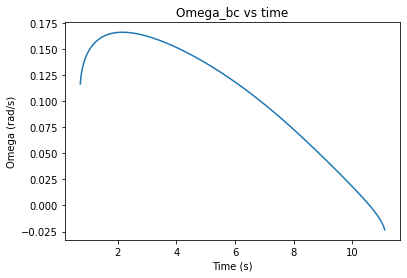

In [ ]:
plt.plot(t, omega_bc)
plt.title("Omega_bc vs time")
plt.xlabel("Time (s)")
plt.ylabel("Omega (rad/s)")

In [ ]:
# now we have omega_bc, omega_cd
# omega_ab is input 
# all positions are known wrt time 
# acceleration analysis can be done

# Acceleration Analysis

In [ ]:
d1 = ( omega_ab*AB*np.cos(theta_ab) + omega_bc**2 * BC*np.cos(theta_bc) + 
        omega_cd**2 * CD* np.cos(theta_bc))
d2 = ( omega_ab*AB*np.sin(theta_ab) + omega_bc**2 * BC*np.sin(theta_bc) + 
        omega_cd**2 * CD* np.sin(theta_bc))

In [ ]:
b1 = -BC*np.sin(theta_bc)
b2 = BC*np.cos(theta_bc)
c1 = -CD*np.sin(theta_cd)
c2 = CD*np.cos(theta_cd)

In [ ]:
num_alph_cd = d1*b2 - d2*b1
den_alph_cd = b2*c1 - b1*c2
alpha_cd = num_alph_cd/den_alph_cd

Text(0, 0.5, 'Alpha (rad/s^2)')

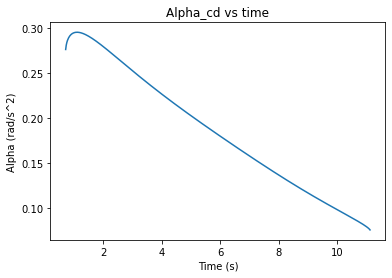

In [ ]:
plt.plot(t, alpha_cd)
plt.title("Alpha_cd vs time")
plt.xlabel("Time (s)")
plt.ylabel("Alpha (rad/s^2)")

In [ ]:
alpha_bc = (d1 - c1*alpha_cd) / b1

Text(0, 0.5, 'Alpha (rad/s^2)')

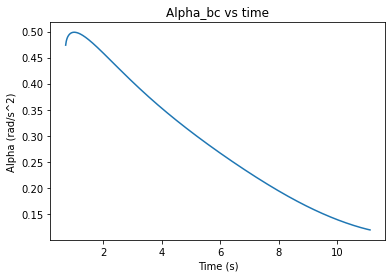

In [ ]:
plt.plot(t, alpha_bc)
plt.title("Alpha_bc vs time")
plt.xlabel("Time (s)")
plt.ylabel("Alpha (rad/s^2)")